# SGDRegressor 

### - Qual o proximo jogo a ser mais vendido?

**Importando as classes nescessária**

In [5]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import snips as snp
from sklearn.metrics import r2_score
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

**Importando o dataset**

In [6]:
df = pd.read_excel("jogo.xlsx")

In [7]:
#Tirando os nan.
df = df.fillna(0)

In [8]:
#removando os nan mais uma vez e os substituindo por zero, e depois esses mesmos foram removidos.
deletar = df.loc[((df.Global_Sales.fillna(0)) == 0) & ((df.Total_Shipped.fillna(0)) == 0)]
a = deletar.index
dados = df.drop(a)

In [9]:
#juntando os as vendas em uma única categoria.
dados["Sales"] = dados["Global_Sales"].fillna(0) + dados["Total_Shipped"].fillna(0)

In [10]:
dados = dados.drop(columns = ["Global_Sales","Total_Shipped","url","status","img_url","NA_Sales" ,"PAL_Sales","JP_Sales" ,"Other_Sales","VGChartz_Score"])


In [11]:
limpa = dados.loc[((dados.Sales != 0 ) & (dados.Critic_Score != 0))]
limpa

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Last_Update,Vgchartzscore,Sales
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,0.0,2006.0,0,0.0,82.86
1,2,Super Mario Bros.,super-mario-bros,Platform,0,NES,Nintendo,Nintendo EAD,10.0,0.0,1985.0,0,0.0,40.24
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,11th Apr 18,8.7,37.14
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,0,8.8,33.09
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,9.4,0.0,1998.0,0,0.0,31.38
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,2006.0,0,0.0,30.80
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,2009.0,0,9.1,30.22
9,10,Minecraft,minecraft,Misc,0,PC,Mojang,Mojang AB,10.0,0.0,2010.0,05th Aug 18,0.0,30.01
11,12,Wii Play,wii-play,Misc,E,Wii,Nintendo,Nintendo EAD,5.9,4.5,2007.0,0,5.3,28.02
12,13,Kinect Adventures!,kinect-adventures,Party,E,X360,Microsoft Game Studios,Good Science Studio,6.7,0.0,2010.0,29th Sep 18,6.2,24.00


**SGDRegressor**

In [12]:
#Importando a regressão.
from sklearn.linear_model import SGDRegressor

In [13]:
fitter = SGDRegressor(loss="squared_loss", penalty=None)

In [14]:
#utilizando a função dummify para converter palavras em numeros.
def dummify(data, column_name):
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [15]:
data_dum=dummify(limpa[["Critic_Score", "User_Score","Vgchartzscore","Genre","Sales","Platform","Publisher","Developer"]],["Genre","Platform","Publisher","Developer"])
len(data_dum.columns)

1408

In [16]:
lista_nova = list(data_dum.columns)
lista_nova.remove("Sales")
data_trei = data_dum[lista_nova]
sales = data_dum["Sales"]

**Treinamento do Programa**

In [17]:
#serparando o dataset em treinamento e tese
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_trei,sales, test_size=0.2, random_state=RANDOM_SEED)



In [18]:
X = X_train.as_matrix(columns=list(X_train.columns)) 


C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [19]:
X

array([[6.6, 0. , 0. , ..., 0. , 0. , 0. ],
       [7.7, 0. , 0. , ..., 0. , 0. , 0. ],
       [9. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [7.8, 0. , 0. , ..., 0. , 0. , 0. ],
       [7.3, 0. , 8. , ..., 0. , 0. , 0. ],
       [4.8, 4.8, 0. , ..., 0. , 0. , 0. ]])

In [20]:
y = pd.Series(y_train).tolist()

**Fazendo a SGDRegressor**

In [21]:
fitter.fit(X, y)

C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

**Testando a SGDRegressor**

In [22]:
resultado=fitter.predict(X_test)
resultado

array([ 1.37710891e+00,  2.33697131e+00,  1.83503446e+00, -9.00671509e-02,
        2.59241816e+00,  2.12937508e-01, -1.99835385e-01,  9.03157966e-01,
        3.12725783e-01,  1.21201495e+00,  1.37788422e-01,  3.34431440e-01,
        4.44776905e+00, -2.99352580e-01,  3.98620152e-01,  7.58854042e-01,
        7.75636779e-01,  5.87547633e-01,  6.95739764e-01,  2.35842155e+00,
        1.11227122e+00,  9.77947236e-01,  1.23877812e+00,  8.71084016e-01,
        9.59757845e-01,  1.15021399e+00,  4.75496836e-01,  1.04377203e+00,
        6.60889784e-01,  2.55191822e+00, -8.51973200e-01,  5.81629035e-01,
        2.72857395e+00,  4.67747795e-01,  8.30984591e-01,  7.80561457e-02,
        1.68513546e+00,  1.21548451e+00,  5.92458883e-01,  1.03358789e+00,
        1.60108739e+00,  1.40768520e+00,  3.46555281e+00,  9.74974514e-01,
        2.86898776e-01,  2.09206276e+00,  7.49494960e-01,  6.01836757e-01,
        2.04780331e+00,  2.59446522e+00,  8.22117286e-01,  9.72441797e-01,
        7.18106362e-01,  

In [23]:
#Erro Quadrático.
erro_quad=r2_score(y_test,resultado)
erro_quad

0.2373987953086263

In [24]:
#índice de acerto entre previsto e o real.
e = 0.10
teste_score = []
acertos_score = []
for previsao,real in zip(resultado,y_test):
    if previsao <= real + real*e and previsao >= real - real*e:

        acertos_score.append(1)

    teste_score.append(0)
    
acertos_score_ = ((len(acertos_score)/len(teste_score))*100)
print("A taxa de acertos foi de {0:.2f}%".format(acertos_score_))

A taxa de acertos foi de 5.31%


**Gráfico com a predição e o real**

<IPython.core.display.Javascript object>


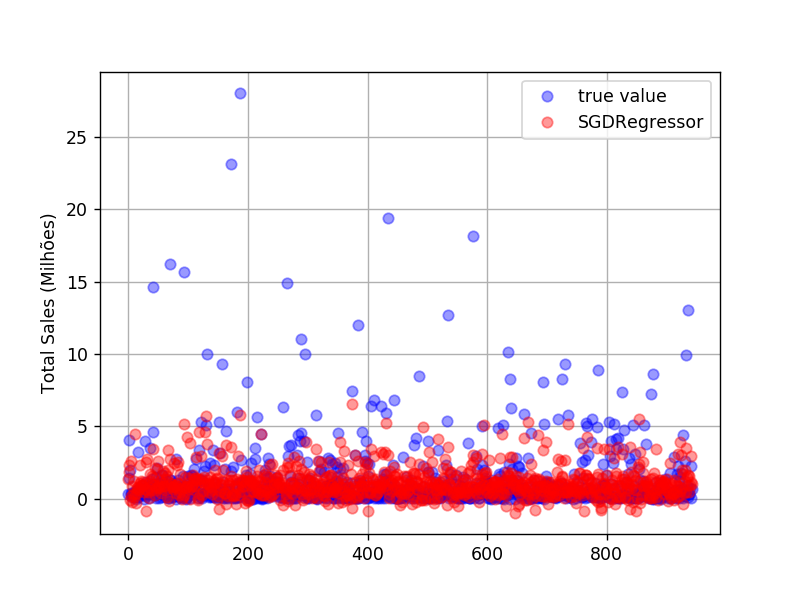

In [25]:

x = np.linspace(0, len(resultado), len(resultado))
plt.plot(x,y_test,'bo',alpha=0.4,label="true value")
plt.plot(x,resultado,'ro',alpha=0.4,label="SGDRegressor")
plt.legend()
plt.ylabel("Total Sales (Milhões)")
plt.grid(True)
plt.show()


***Legenda:***
    Nesse gráfico contém os valores reais, e os valores previstos pela regressão.